<a href="https://colab.research.google.com/github/Izziemirg/Data-Visualizations/blob/main/AI_model_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

In [ ]:
!pip install kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
model_df = pd.read_excel('AI_accuracy.xlsx', header=1)

model_df.head()

,HELMs Ranking,Model Name,Creator,Mean Score,General Knowledge,Scientific Reasoning,Instruction Following,Practical Tasks,Math Reasoning
0,4.0,GPT-5,Open AI,0.807,0.863,0.791,0.875,0.857,0.647
1,5.0,Qwen3,Alibaba Cloud,0.798,0.844,0.726,0.835,0.866,0.718
2,6.0,Grok 4.0,xAI,0.785,0.851,0.726,0.949,0.797,0.603
3,7.0,Claude 4 Opus (extended thinking),Anthropic,0.780,0.875,0.709,0.849,0.852,0.616
4,10.0,Claude 4 Sonnet (extended thinking),Anthropic,0.766,0.843,0.706,0.840,0.838,0.602


In [ ]:
if 'Unnamed: 0' in model_df.columns:
    model_df = model_df.drop(columns=['Unnamed: 0'])

    model_df.head()

In [ ]:
print(model_df.columns.tolist())

['HELMs Ranking', 'Model Name', 'Creator', 'Mean Score', 'General Knowledge', 'Scientific Reasoning', 'Instruction Following', 'Practical Tasks', 'Math Reasoning']


In [ ]:
print(model_df.columns)
print(model_df.shape)
model_df.head()

Index(['HELMs Ranking', 'Model Name', 'Creator', 'Mean Score',
       'General Knowledge', 'Scientific Reasoning', 'Instruction Following',
       'Practical Tasks', 'Math Reasoning'],
      dtype='object')
(7, 9)


,HELMs Ranking,Model Name,Creator,Mean Score,General Knowledge,Scientific Reasoning,Instruction Following,Practical Tasks,Math Reasoning
0,4.0,GPT-5,Open AI,0.807,0.863,0.791,0.875,0.857,0.647
1,5.0,Qwen3,Alibaba Cloud,0.798,0.844,0.726,0.835,0.866,0.718
2,6.0,Grok 4.0,xAI,0.785,0.851,0.726,0.949,0.797,0.603
3,7.0,Claude 4 Opus (extended thinking),Anthropic,0.780,0.875,0.709,0.849,0.852,0.616
4,10.0,Claude 4 Sonnet (extended thinking),Anthropic,0.766,0.843,0.706,0.840,0.838,0.602


In [ ]:
model_df = model_df.dropna(subset=['Model Name'] + categories_2)

In [ ]:
f = plt.figure(figsize=(8,8))

categories = ["General Knowledge", "Scientific Reasoning", "Instruction Following", "Practical Tasks", "Math Reasoning"]
N = len(categories)

angles = np.linspace(0, 2 * np.pi, 5, endpoint=False)
print(angles)
angles = np.concatenate((angles, [angles[0]]))
print(angles)

[0.         1.25663706 2.51327412 3.76991118 5.02654825]
[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]


<Figure size 800x800 with 0 Axes>

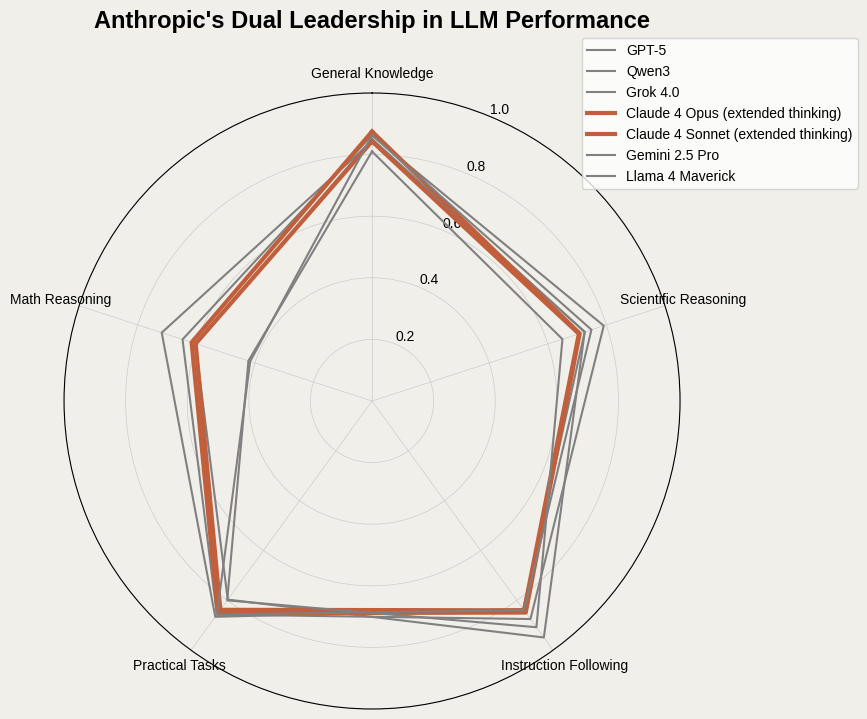

In [ ]:
plt.rcParams['font.family'] = 'Liberation Sans'

values_df = model_df[categories]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

for index, row in values_df.iterrows():
    values = row.tolist()
    values += [values[0]]

    if index == 3 or index == 4:
        color = '#C15F3C'
        linewidth = 3
    else:
        color = 'grey'
        linewidth = 1.5

    model_name = model_df.iloc[index]['Model Name']
    ax.plot(angles, values, color=color, linewidth=linewidth, label=model_name)


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_title("Anthropic's Dual Leadership in LLM Performance", weight='bold', size=17, pad=47)
ax.grid(color='#CCCCCC', linestyle='solid', linewidth='0.5')

ax.set_yticks([0.2,0.4, 0.6, 0.8, 1.0])

fig.patch.set_facecolor('#F0EFEA')
ax.set_facecolor('#F0EFEA')

In [ ]:
import matplotlib.font_manager
available_fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(sorted(set(available_fonts)))

['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [ ]:
categories_1 = ["Scientific Reasoning", "General Knowledge", "Instruction Following", "Practical Tasks", "Math Reasoning"]


colors_values = []

linewidth = []

for model in model_df['Model Name']:
    model_str = str(model)
    if 'Claude' in model_str:
        colors_values.append(1.0)
        linewidth.append(3)
    else:
        colors_values.append(0.0)
        linewidth.append(1.5)

dimensions = []

for category in categories_1:
    dimensions.append(dict(
            range=[0.4, 1.0],
            label=category,
            values=model_df[category].tolist()
        )
    )

fig = go.Figure(data=go.Parcoords(
        line=dict(
            color=colors_values,
            colorscale=[[0.0, 'grey'], [1.0, '#C15F3C']],
            showscale=False,
            cmin=0,
            cmax=1
        ),
        dimensions=dimensions,
        labelangle=0,
        labelside='bottom'
    )
)

fig.update_layout(
    title='Anthropic\'s Dual Leadership in LLM Performance',
    title_font_size=20,
    font_size=12,
    height=500,
    width=1200,
    margin=dict(l=150, r=150, t=100, b=100),
    plot_bgcolor='#F0EFEA',
    paper_bgcolor='#F0EFEA'
)

fig.show()


In [ ]:
categories_2 = ["General Knowledge", "Scientific Reasoning", "Instruction Following", "Practical Tasks", "Math Reasoning"]


colors_values = []

linewidth = []

for model in model_df['Model Name']:
    model_str = str(model)
    if 'Claude' in model_str:
        colors_values.append(1.0)
        linewidth.append(3)
    else:
        colors_values.append(0.0)
        linewidth.append(1.5)

dimensions = []

for category in categories_2:
    dimensions.append(dict(
            range=[0.4, 1.0],
            label=category,
            values=model_df[category].tolist()
        )
    )

fig = go.Figure(data=go.Parcoords(
        line=dict(
            color=colors_values,
            colorscale=[[0.0, 'grey'], [1.0, '#C15F3C']],
            showscale=False,
            cmin=0,
            cmax=1
        ),
        dimensions=dimensions,
        labelangle=0,
        labelside='bottom'
    )
)

fig.update_layout(
    title='Anthropic\'s Dual Leadership in LLM Performance',
    title_font_size=20,
    font_size=12,
    height=500,
    width=1200,
    margin=dict(l=150, r=150, t=100, b=100),
    plot_bgcolor='#F0EFEA',
    paper_bgcolor='#F0EFEA'
)

fig.show()

In [ ]:
print(model_df.shape)
print(model_df.columns.tolist())
print(model_df.head())
print(model_df.dtypes)

(11, 9)
['HELMs Ranking', 'Model Name', 'Creator', 'Mean Score', 'General Knowledge', 'Scientific Reasoning', 'Instruction Following', 'Practical Tasks', 'Math Reasoning']
   HELMs Ranking                           Model Name        Creator  \
0            4.0                                GPT-5        Open AI   
1            5.0                                Qwen3  Alibaba Cloud   
2            6.0                             Grok 4.0            xAI   
3            7.0    Claude 4 Opus (extended thinking)      Anthropic   
4           10.0  Claude 4 Sonnet (extended thinking)      Anthropic   

   Mean Score  General Knowledge  Scientific Reasoning  Instruction Following  \
0       0.807              0.863                 0.791                  0.875   
1       0.798              0.844                 0.726                  0.835   
2       0.785              0.851                 0.726                  0.949   
3       0.780              0.875                 0.709                 

In [ ]:
categories_2 = ["Instruction Following", "Math Reasoning","General Knowledge", "Scientific Reasoning", "Practical Tasks"]

fig = go.Figure()

x_positions = [i + 1.0 for i in range(len(categories_2))]


for idx, row in model_df.iterrows():
    model_name = row['Model Name']

    if 'Claude' in str(model_name):
        color = '#C15F3C'
        width = 3
    else:
        color = 'grey'
        width = 1.5


    y_values = [row[cat] for cat in categories_2]


    fig.add_trace(go.Scatter(
        x=x_positions,
        y=y_values,
        mode='lines',
        line=dict(color=color, width=width),
        name=model_name,
        hovertemplate='<b>%{fullData.name}</b><br>%{y:.3f}<extra></extra>'
    ))

fig.update_layout(
    title=dict(
        text='Anthropic\'s Dual Leadership in LLM Performance',
        font=dict(size=20, color='black')
    ),
    font=dict(size=12, color='black'),
    height=500,
    width=1200,
    margin=dict(l=150, r=150, t=100, b=120),
    plot_bgcolor='#F0EFEA',
    paper_bgcolor='#F0EFEA',
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.02,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
        font=dict(color='black')
    ),
    xaxis=dict(
        tickmode='array',
        tickvals=x_positions,
        ticktext=categories_2,
        tickangle=0,
        showgrid=True,
        gridcolor='white',
        side='bottom',
        tickfont=dict(size=12, color='black'),
        ticklabelstandoff=15,
        title=dict(font=dict(color='black'))
    ),
    yaxis=dict(
        range=[0.4, 1.0],
        showgrid=True,
        gridcolor='white',
        title=dict(
            text='Performance Score (0-1)',
            font=dict(color='black')
        ),
        tickfont=dict(color='black')
    )
)

fig.show()

In [ ]:
print(model_df[['Model Name'] + categories_2].isnull().sum())
print(model_df[['Model Name'] + categories_2])

Checking for null values:
Model Name               0
Instruction Following    0
Math Reasoning           0
General Knowledge        0
Scientific Reasoning     0
Practical Tasks          0
dtype: int64

DataFrame:
                            Model Name  Instruction Following  Math Reasoning  \
0                                GPT-5                  0.875           0.647   
1                                Qwen3                  0.835           0.718   
2                             Grok 4.0                  0.949           0.603   
3    Claude 4 Opus (extended thinking)                  0.849           0.616   
4  Claude 4 Sonnet (extended thinking)                  0.840           0.602   
5                       Gemini 2.5 Pro                  0.840           0.416   
6                     Llama 4 Maverick                  0.908           0.422   

   General Knowledge  Scientific Reasoning  Practical Tasks  
0              0.863                 0.791            0.857  
1             

In [ ]:
import plotly.graph_objects as go

model_df_clean = model_df.dropna(subset=['Model Name'] + categories_2)

models = model_df_clean['Model Name'].tolist()
categories = ["General Knowledge", "Scientific Reasoning", "Instruction Following", "Practical Tasks", "Math Reasoning"]


z_values = model_df_clean[categories].values

fig = go.Figure(data=go.Heatmap(
    z=z_values,
    x=categories,
    y=models,
    colorscale='RdYlGn',
    text=z_values,
    texttemplate='%{text:.3f}',
    textfont={"size": 10},
    colorbar=dict(title="Performance Score"),
    zmin=0.4,
    zmax=1.0
))

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Model',
    font=dict(size=12, color='black'),
    height=500,
    width=900,
    plot_bgcolor='#F0EFEA',
    paper_bgcolor='#F0EFEA'
)

fig.show()